In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from fredapi import Fred
from use_key import get_api_key

In [5]:
fred = Fred(api_key=get_api_key())

In [164]:
m2_df = fred.search(
    text='Real M2 Money Stock',
)
m2_df = m2_df.query('title == "Real M2 Money Stock"')
m2_df = fred.get_series(series_id=m2_df.index[0]).to_frame(name='Money Supply')
m2_df_2000_2023 = m2_df.loc['2000-01-01': '2023-11-01']
line_chart = px.line(m2_df_2000_2023)
line_chart.show()

In [165]:
from copy import copy

prev_value = None
m2_df_2000_2023_monthly_pchange = copy(m2_df_2000_2023)
for index, value in m2_df_2000_2023_monthly_pchange['Money Supply'].items():
    if prev_value is None:
        m2_df_2000_2023_monthly_pchange.at[index, 'Money Supply'] = 0
    else:
        difference = value - prev_value
        percentage = round(((difference / value) * 100), 2)
        m2_df_2000_2023_monthly_pchange.at[index, 'Money Supply'] = percentage
    prev_value = value

bar_chart = px.bar(m2_df_2000_2023_monthly_pchange, title='Percentage Increase Of Money Supply By Month')
bar_chart.show()
        

In [166]:
cpi_df = fred.search(
    text='cpi',
    order_by='popularity',
    filter=('frequency', 'Monthly')
)
median_cpi_df = fred.get_series(series_id='MEDCPIM158SFRBCLE')
median_cpi_df = median_cpi_df.to_frame(name='Median CPI')
median_cpi_df_2020_2023 = median_cpi_df.loc['2000-01-01':'2023-11-01']
bar_chart = px.bar(median_cpi_df_2020_2023, title='Median CPI Monthly')
bar_chart.show()

In [169]:
merged_cpi_money_supply = pd.merge(
    median_cpi_df_2020_2023,
    m2_df_2000_2023_monthly_pchange,
    right_index=True,
    left_index=True,
)
fig = px.bar(merged_cpi_money_supply, title='Bar Chart AVG CPI and M2 Money Supply', barmode='group')
fig.show()

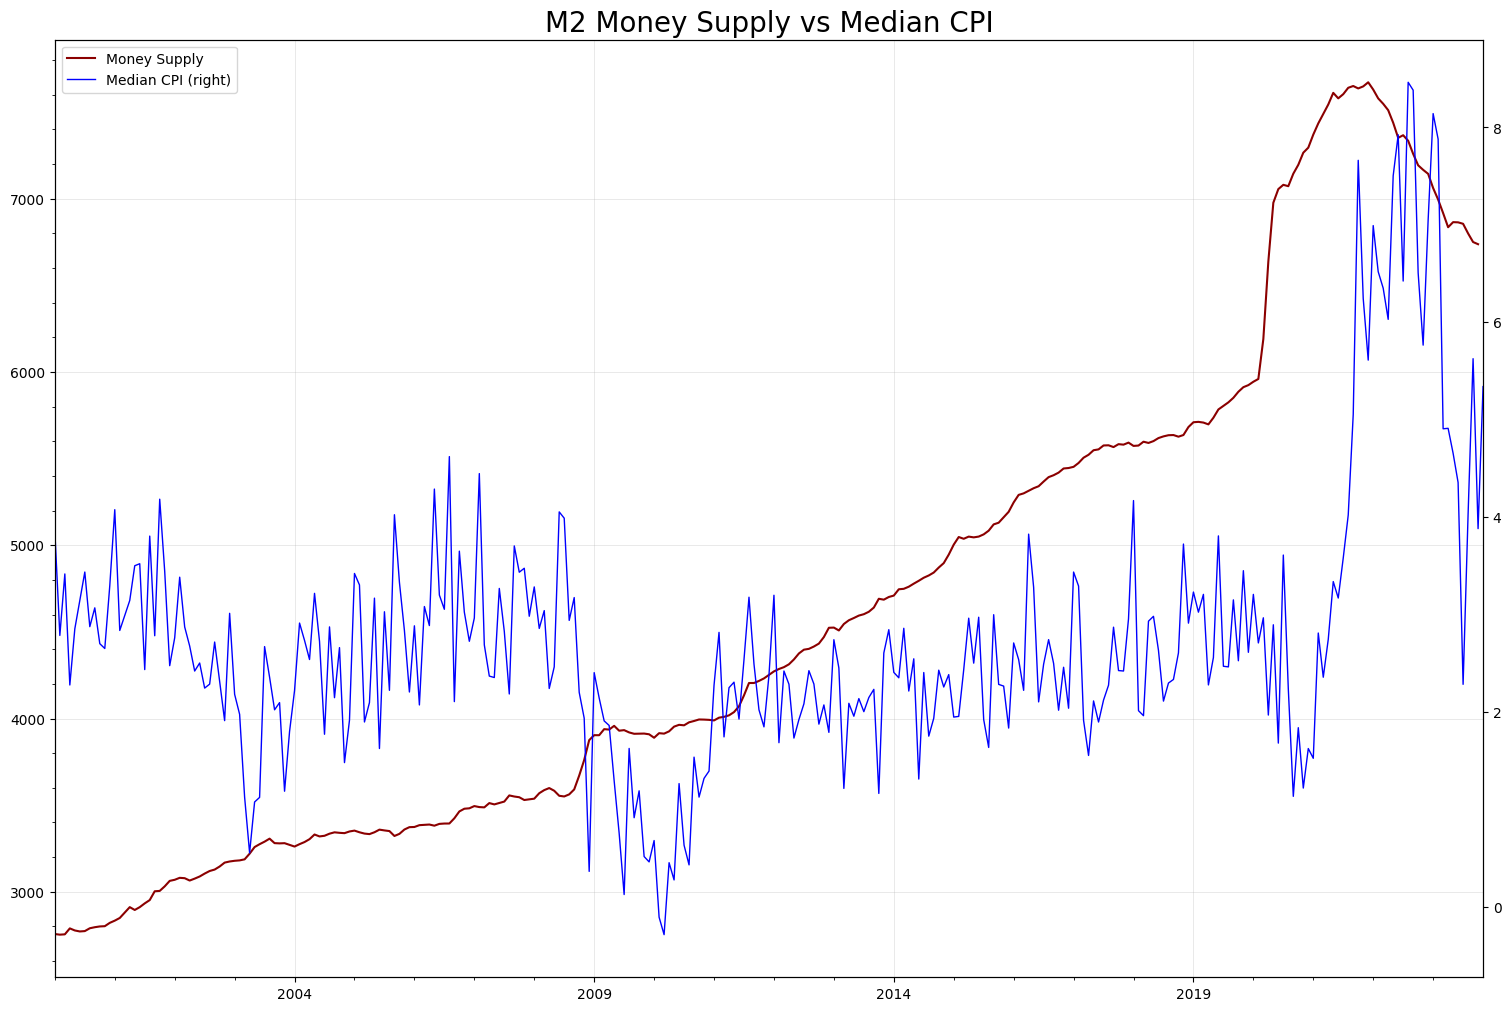

In [293]:
# m2_df_2000_2023
# median_cpi_df_2020_2023
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(15, 10), layout='constrained')


m2_df_2000_2023.plot(color='darkred', ax=ax, kind='line')
median_cpi_df_2020_2023.plot(kind='line', color='blue', secondary_y=True, ax=ax, lw=1)

ax.grid(True, alpha=0.4, linewidth=0.5)
ax.set_title('M2 Money Supply vs Median CPI', fontsize=20)
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(200))


plt.show()



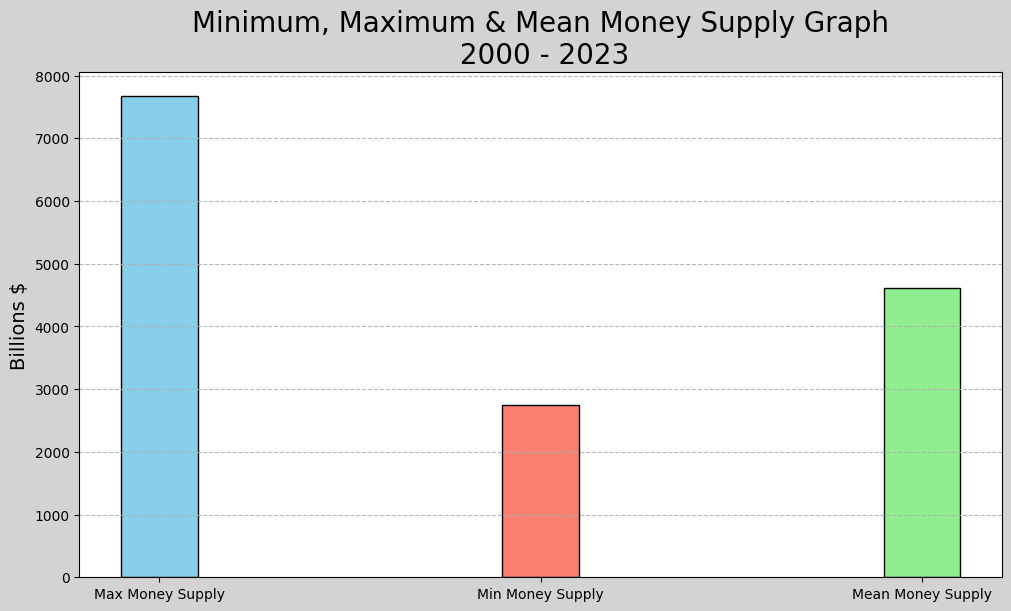

In [375]:
max_m2_2000_2023 = m2_df_2000_2023.max().to_frame(name='Max Money Supply')
min_m2_2000_2023 = m2_df_2000_2023.min().to_frame(name='Min Money Supply')
average_m2_2000_2023 = m2_df_2000_2023.mean().to_frame(name='Mean Money Supply')

chart_info = {
    max_m2_2000_2023.columns[0]: max_m2_2000_2023[max_m2_2000_2023.columns[0]].item(),
    min_m2_2000_2023.columns[0]: min_m2_2000_2023[min_m2_2000_2023.columns[0]].item(),
    average_m2_2000_2023.columns[0]: average_m2_2000_2023[average_m2_2000_2023.columns[0]].item()
}

categories = list(chart_info.keys())
values = list(chart_info.values())
bar_colors = ['skyblue', 'salmon', 'lightgreen']

fig, ax = plt.subplots(figsize=(10,6), layout='constrained')
fig.set_facecolor('lightgray')
bars = ax.bar(categories, values, width=0.2,color=bar_colors, edgecolor='black')

ax.set_facecolor('white')
ax.set_ylabel('Billions $', fontsize=14)
ax.set_title('Minimum, Maximum & Mean Money Supply Graph\n 2000 - 2023', fontsize=20)
ax.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()

